In [1]:
import numpy as np
import matplotlib.pylab as plt

from utils import compute_trajectories, generate_LQR_policy, apply_LQR_policy

# LQR

## Define system variables A and B; and initial conditions x0

In [2]:
# http://www.argmin.net/2018/02/08/lqr/
m = 1.
A = np.array([[1., 1.],
              [0., 1.]])
B = np.array([[0],
             [1./m]])

# arbitrarily chosen initial conditions
x0 = np.array([[1.],
              [0.]])

## Define cost

In [3]:
# cost = \sum_t (x_t - x_goal)**2 + u_t**2
Q = np.eye(2)
Q_f = np.eye(2) * 1.
R_small = np.array([[0.3]])
R_large = np.array([[10.]])

## DP solution

In [4]:
T = 20
K_t_small = generate_LQR_policy(A, B, R_small, Q, Q_f, T)
K_t_large = generate_LQR_policy(A, B, R_large, Q, Q_f, T)

x_small, u_small = compute_trajectories(A, B, K_t_small, x0, apply_LQR_policy, T)
x_large, u_large = compute_trajectories(A, B, K_t_large, x0, apply_LQR_policy, T)

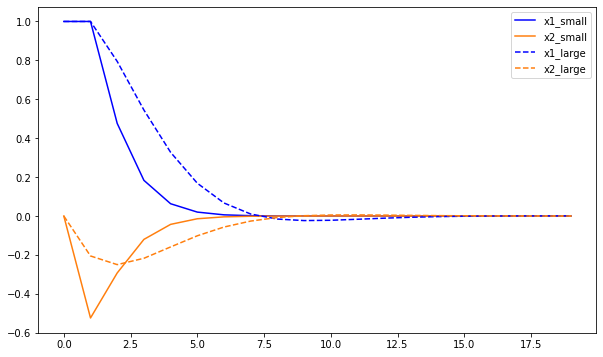

In [5]:
x1_small = [x_t[0] for x_t in x_small]
x2_small = [x_t[1] for x_t in x_small]

x1_large = [x_t[0] for x_t in x_large]
x2_large = [x_t[1] for x_t in x_large]

plt.figure(figsize=[10,6])
plt.plot(x1_small, 'b')
plt.plot(x2_small, 'tab:orange')

plt.plot(x1_large, '--', color='b')
plt.plot(x2_large, '--', color='tab:orange')
plt.legend(['x1_small', 'x2_small', 'x1_large', 'x2_large'])

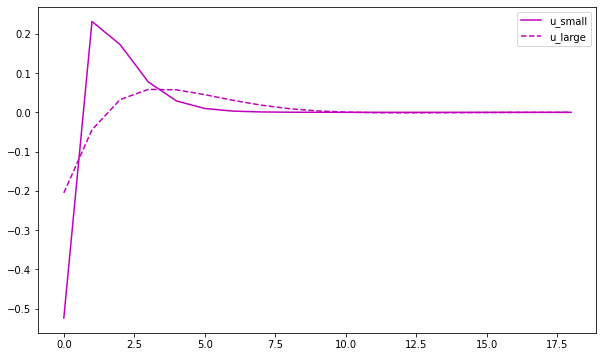

In [6]:
u1_small = [u_t[0] for u_t in u_small]
u1_large = [u_t[0] for u_t in u_large]

plt.figure(figsize=[10,6])
plt.plot(u1_small, 'm')
plt.plot(u1_large, '--', color='m')
plt.legend(['u_small', 'u_large'])